In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/Data Intern/Titanic-Dataset.csv')

# Overview of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
# Drop the 'Cabin' column due to many missing values
titanic_data = titanic_data.drop(columns=['Cabin'])


In [40]:
# Handling missing values
# Fill missing 'Age' values with the median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill missing 'Embarked' values with the mode
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

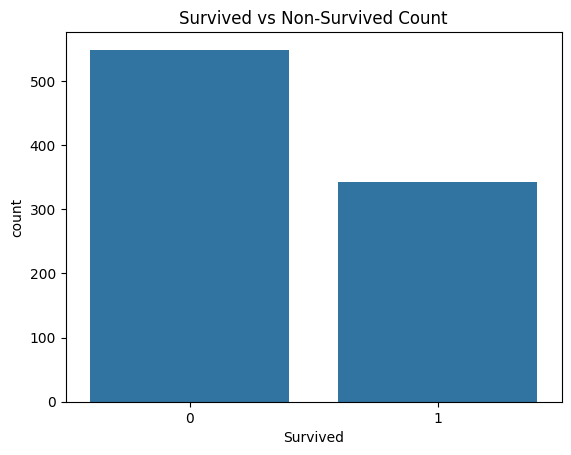

In [41]:
# Exploratory Data Analysis
# Visualize the count of survivors and non-survivors
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survived vs Non-Survived Count')
plt.show()

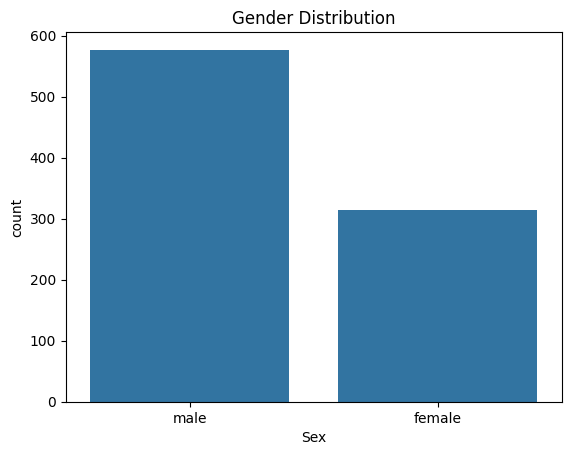

In [42]:
# Visualize the distribution of gender
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

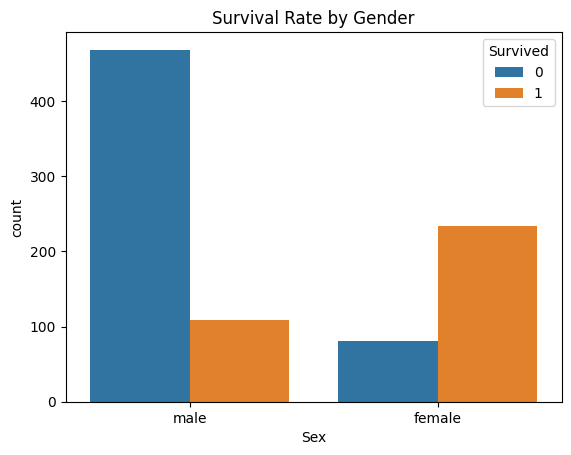

In [43]:
# Visualize survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

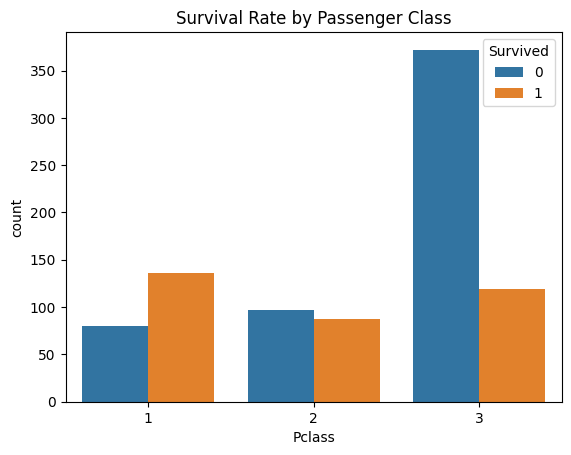

In [44]:
# Visualize survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [45]:
# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})



In [46]:
# Features and target variable
X = titanic_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_data['Survived']

In [47]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [48]:
# Initialize and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
# Predictions on the validation set
y_pred_val = log_reg.predict(X_val_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Logistic Regression model accuracy: {accuracy:.2f}")

Logistic Regression model accuracy: 0.80


In [50]:
print("Classification Report:")
print(classification_report(y_val, y_pred_val))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[90 15]
 [20 54]]
